# Laboratory 6: Frequency Analysis

## Fourier Transform in 1D
### Create your own waveform

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-1-6e8d2447d05b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


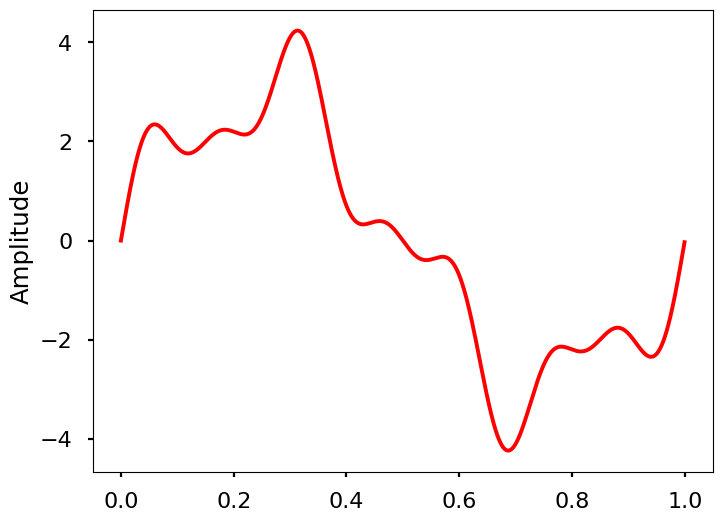

In [ ]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


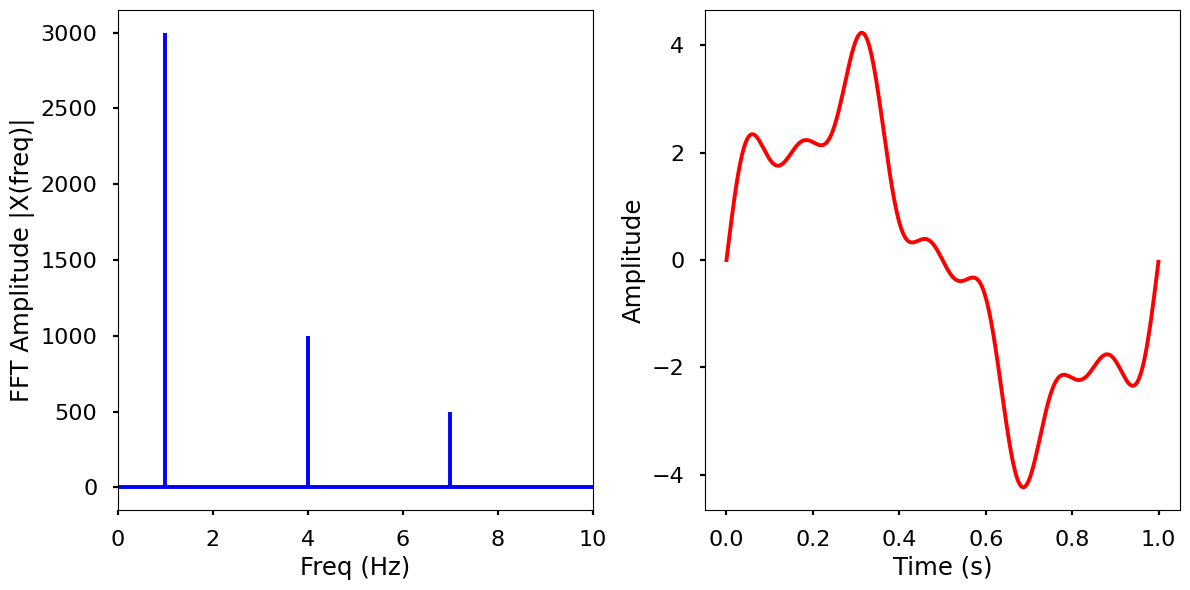

In [ ]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 2D Fourier Transform

## 2D Fourier Transform of simple 2D signals

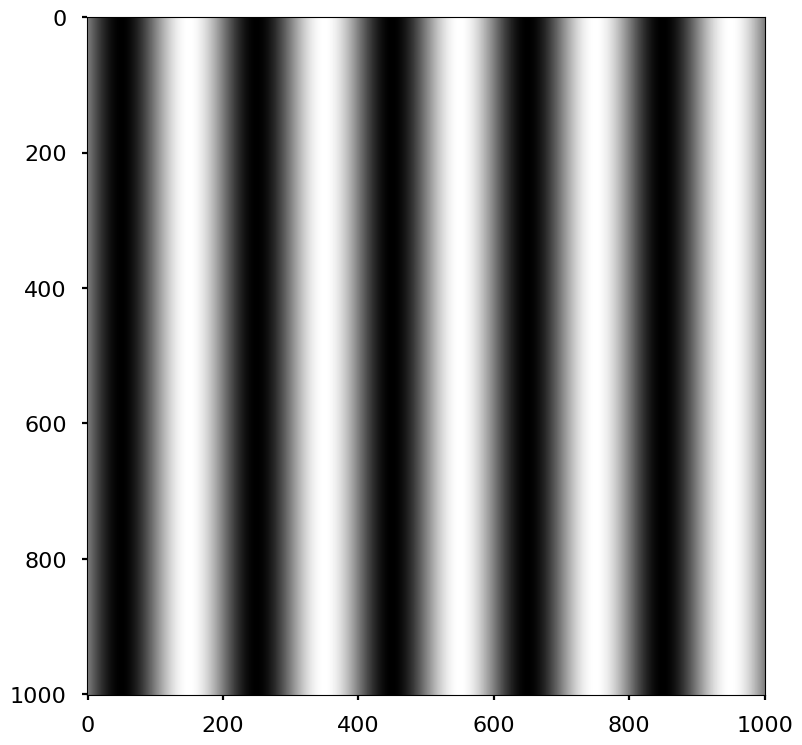

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()


In [ ]:
# ## This take a lot of time to run. You can try it later.

# from matplotlib.colors import LightSource
# from matplotlib import cbook, cm

# # Set up plot
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# ls = LightSource(270, 45)
# # To use a custom hillshading mode, override the built-in shading and pass
# # in the rgb colors of the shaded surface calculated from "shade".
# rgb = ls.shade(grating, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
# surf = ax.plot_surface(X, Y, grating, rstride=1, cstride=1, facecolors=rgb,
#                        linewidth=0, antialiased=False, shade=False)

# plt.show()

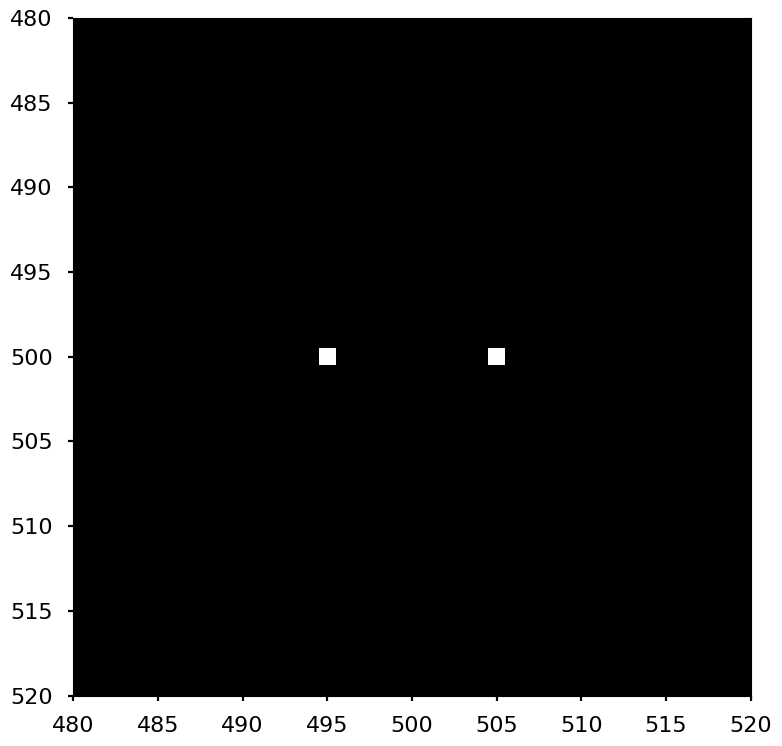

In [ ]:
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

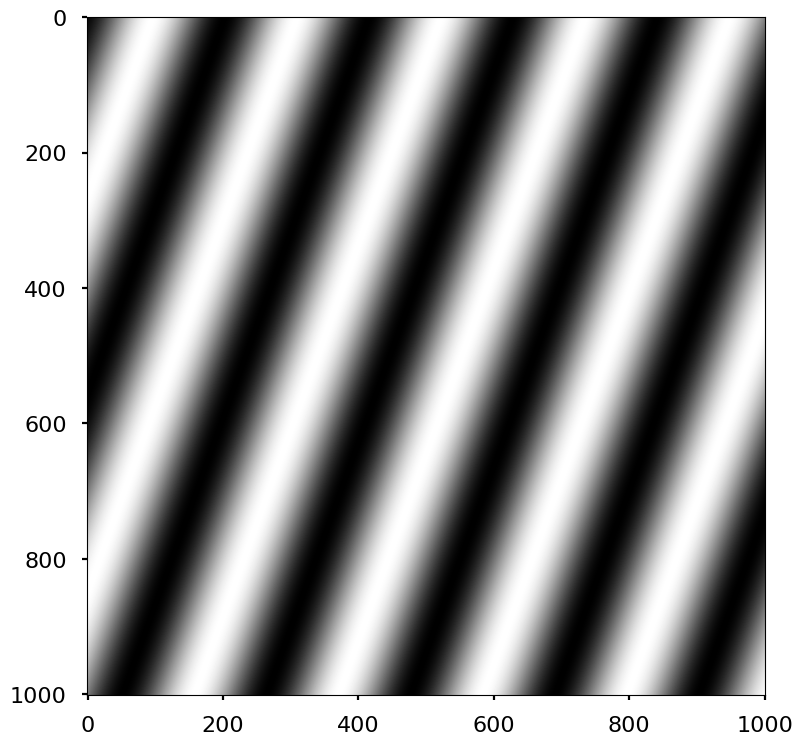

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = np.pi / 9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

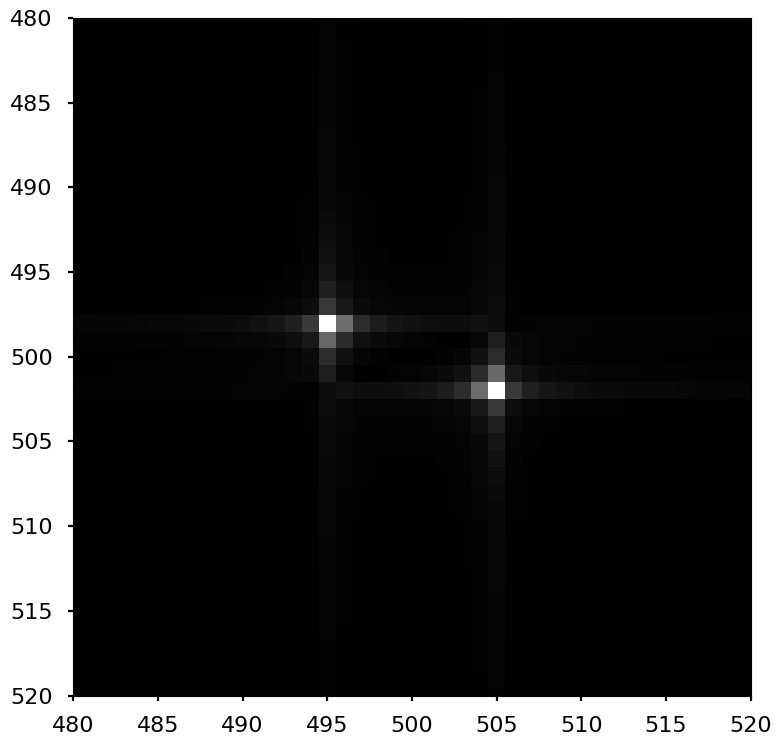

In [ ]:
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()

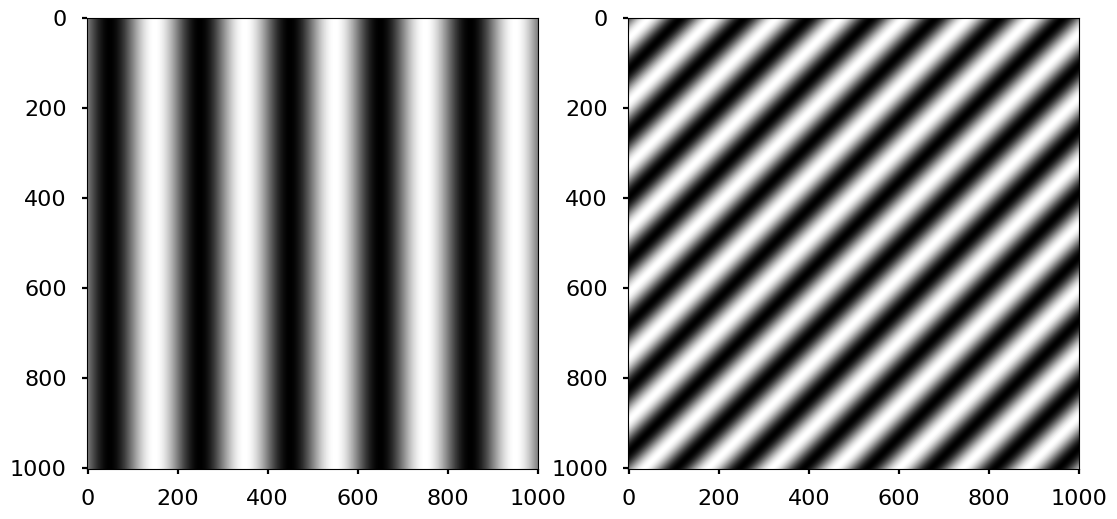

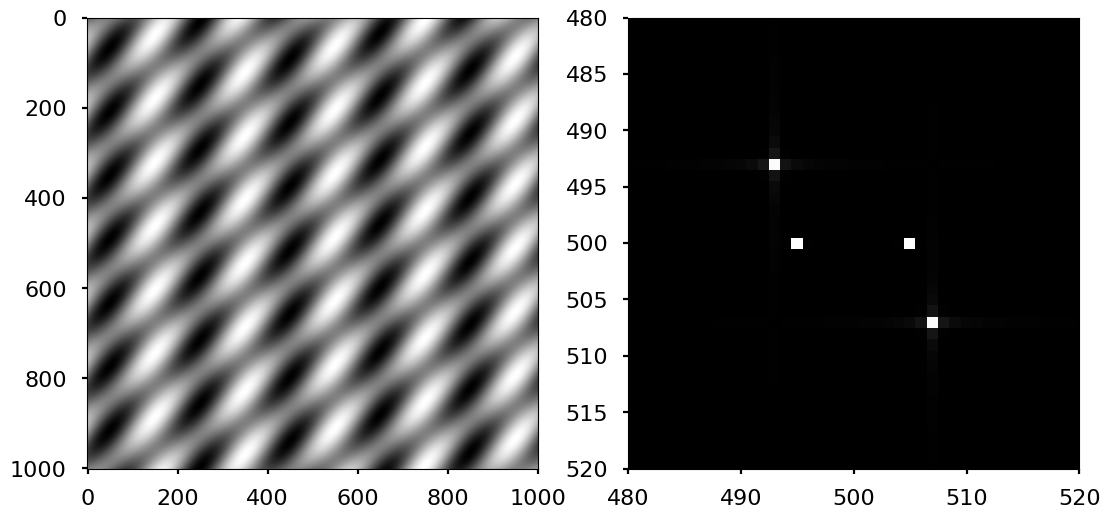

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength_1 = 200
angle_1 = 0
grating_1 = np.sin(
    2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1
)
wavelength_2 = 100
angle_2 = np.pi/4
grating_2 = np.sin(
    2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()
gratings = grating_1 + grating_2

# Calculate Fourier transform of the sum of the two gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.figure()
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

## 2D Fourier Transform of an image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Computer vision/lab06/Images/lenna.png')
assert img is not None, "file could not be read, check with os.path.exists()"

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
f = np.fft.fft2(img_gray, axes=(0,1))
fshift = np.fft.fftshift(f)

# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum = 20*np.log(np.abs(fshift))

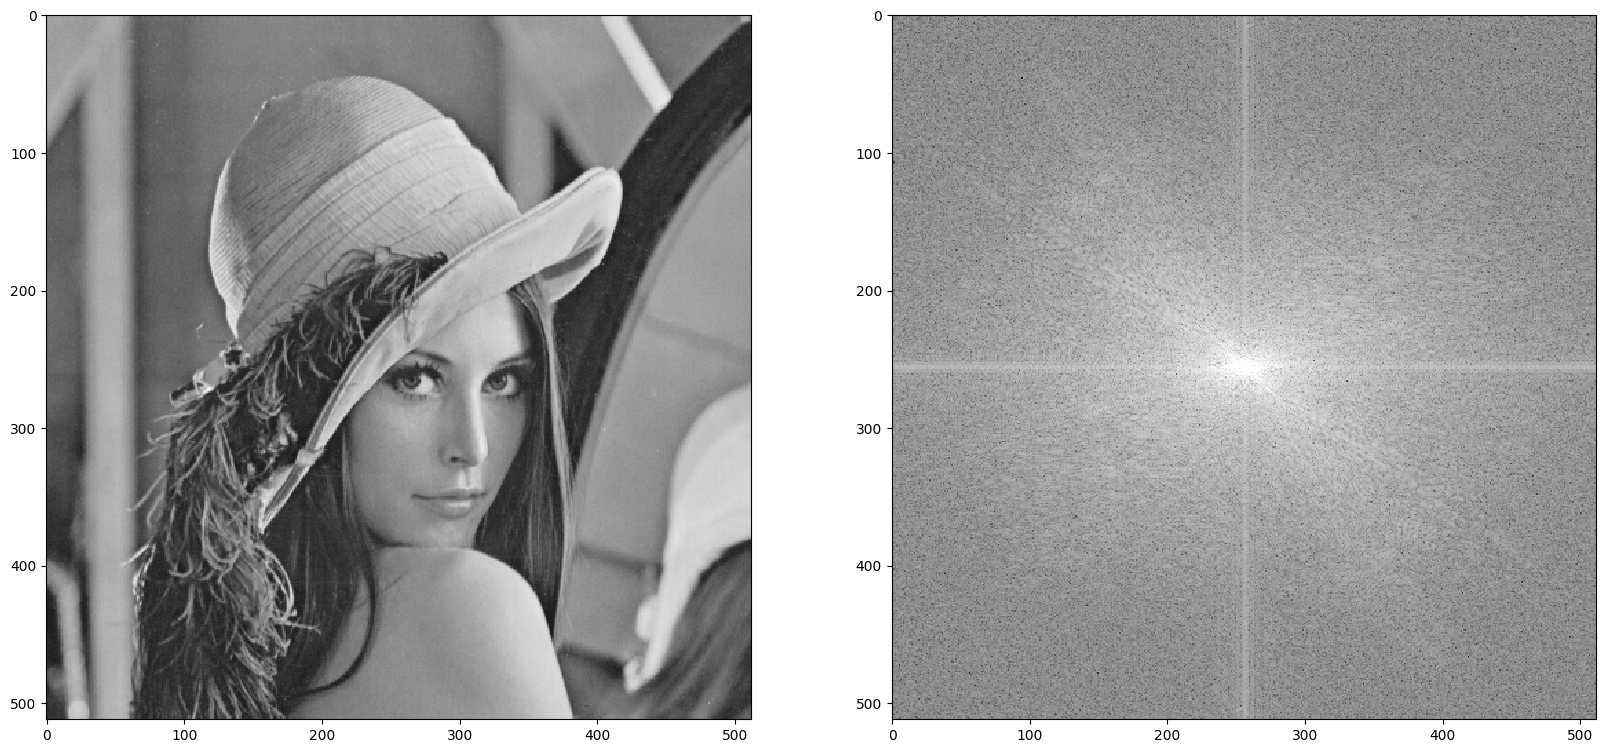

In [4]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

## Manipulating frequencies: Filtering in frequency domain

### Simple cirle mask

In [5]:
# create circle mask
radius = 32
mask = np.zeros_like(img_gray)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

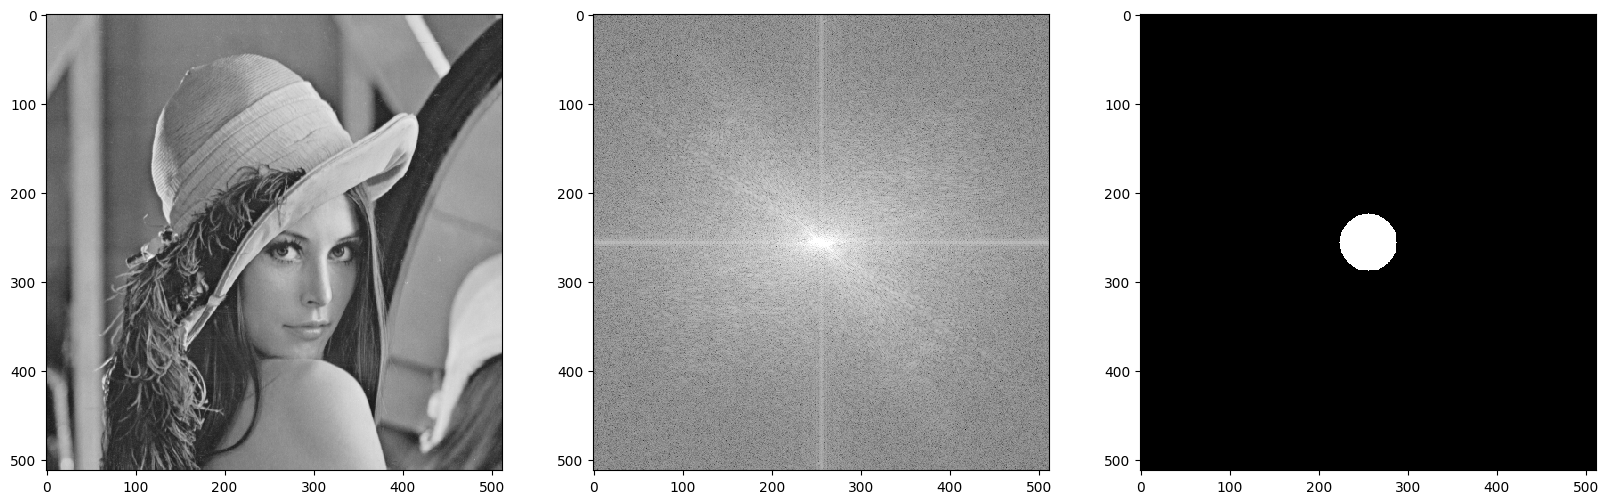

In [6]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(img_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [9]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255
dft_shift_masked

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.-0.j, 0.-0.j],
       ...,
       [0.-0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.-0.j],
       [0.+0.j, 0.-0.j, 0.+0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]])

<ipython-input-10-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


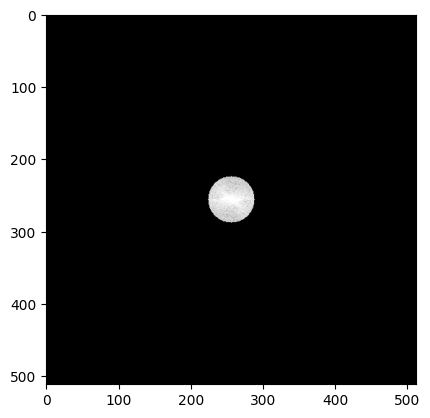

In [10]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

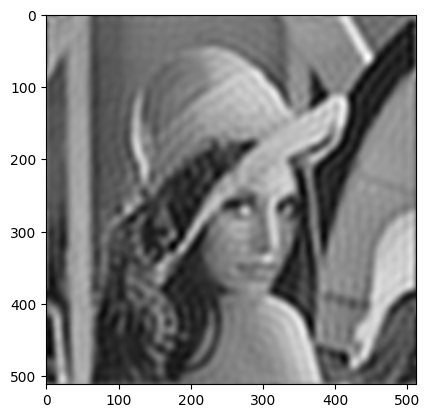

In [11]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

### Gaussian mask

In [12]:
# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

In [13]:
# apply mask to fshift
dft_shift_masked2 = np.multiply(fshift,mask2) / 255

<ipython-input-14-2317f44547c3>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked2 = 20*np.log(np.abs(dft_shift_masked2))


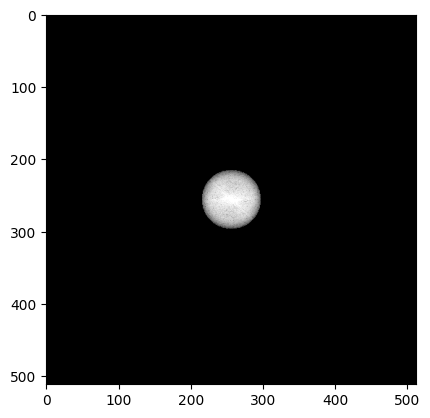

In [14]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked2 = 20*np.log(np.abs(dft_shift_masked2))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked2.clip(0,255))
plt.show()

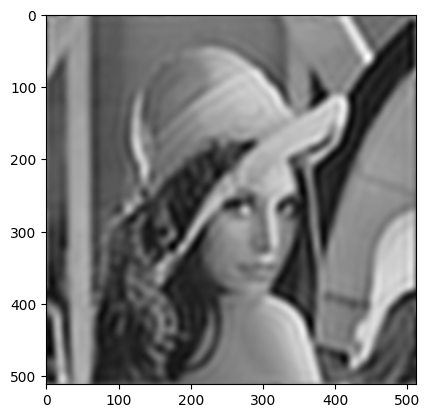

In [15]:
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)

img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered2)
plt.show()

# Assignment 1: Perform High Pass filter

In [ ]:
# Assignment 1: Perform High pass filter, Band pass filter, and Band elimination filter in frequency domain:
# Hint1: Create a new mask that can remove the target frequency.
# Hint2: High pass filter is the inverse of low pass filter

##Low

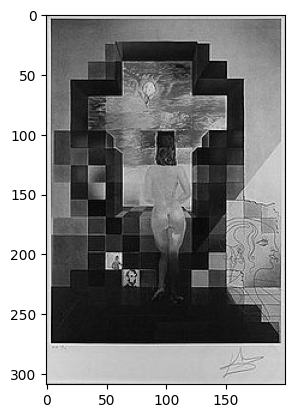

In [45]:
imgA1 = cv2.imread('/content/drive/MyDrive/Computer vision/lab06/Images/test1.jpg')
imgA1_gray = cv2.cvtColor(imgA1,cv2.COLOR_BGR2GRAY)
plt.imshow(imgA1_gray)

In [46]:
f = np.fft.fft2(imgA1_gray, axes=(0,1))
fshift = np.fft.fftshift(f)

# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [57]:
# create circle mask
radius = 32
mask = np.zeros_like(imgA1_gray)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

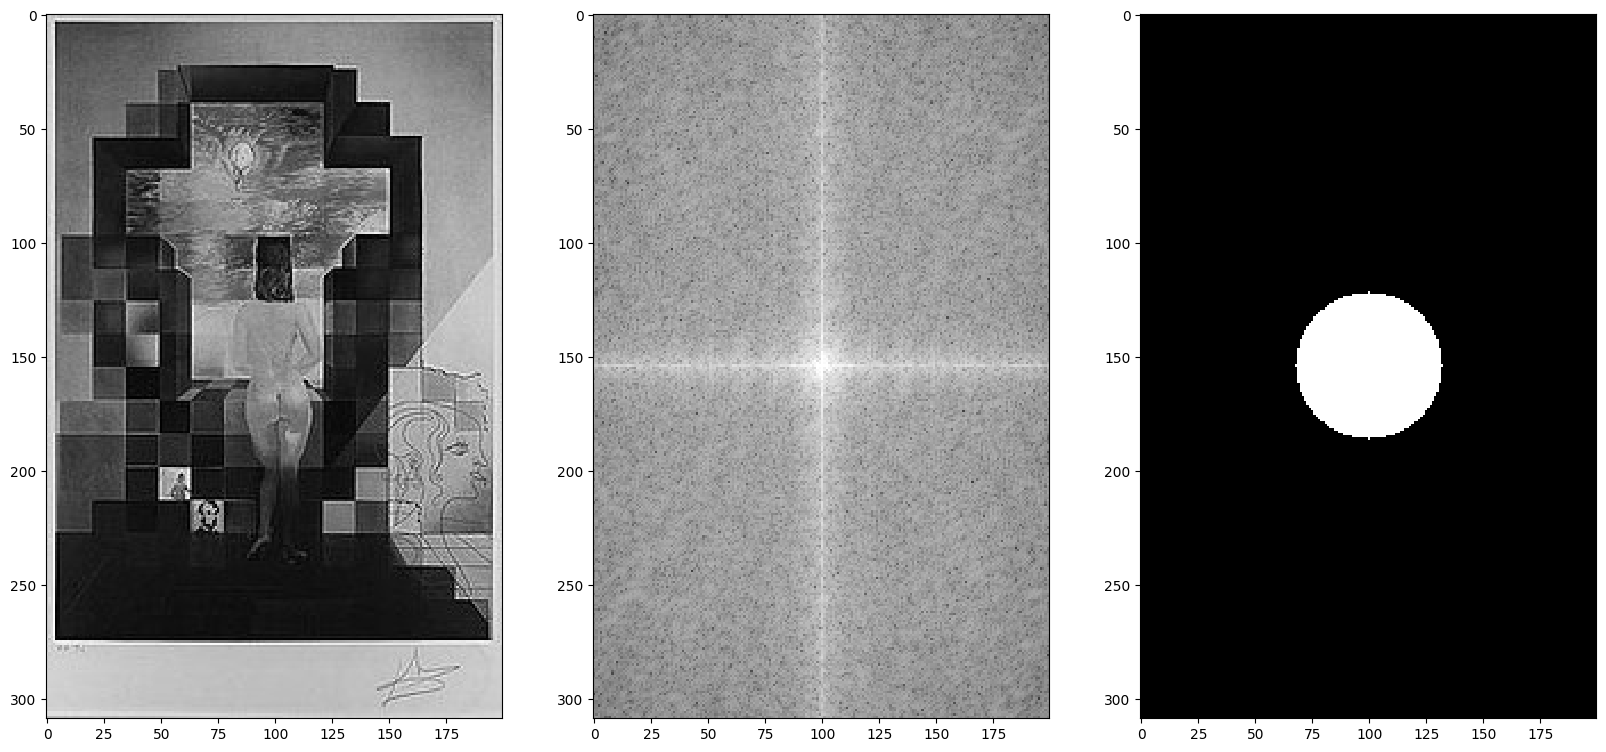

In [58]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [59]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-60-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


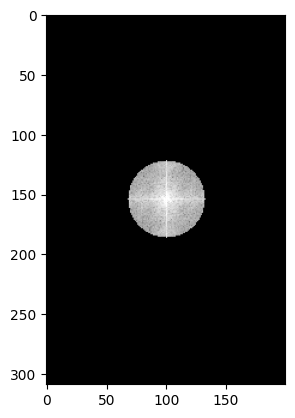

In [60]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

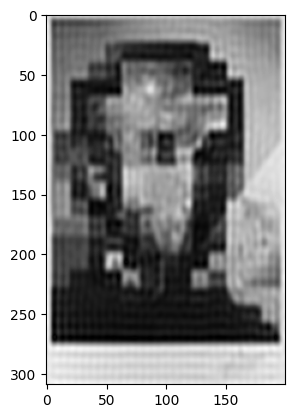

In [61]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

##Perform High pass filter

In [63]:
# create circle mask
radius = 10
mask = np.zeros_like(imgA1_gray)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [64]:
mask = np.invert(mask)

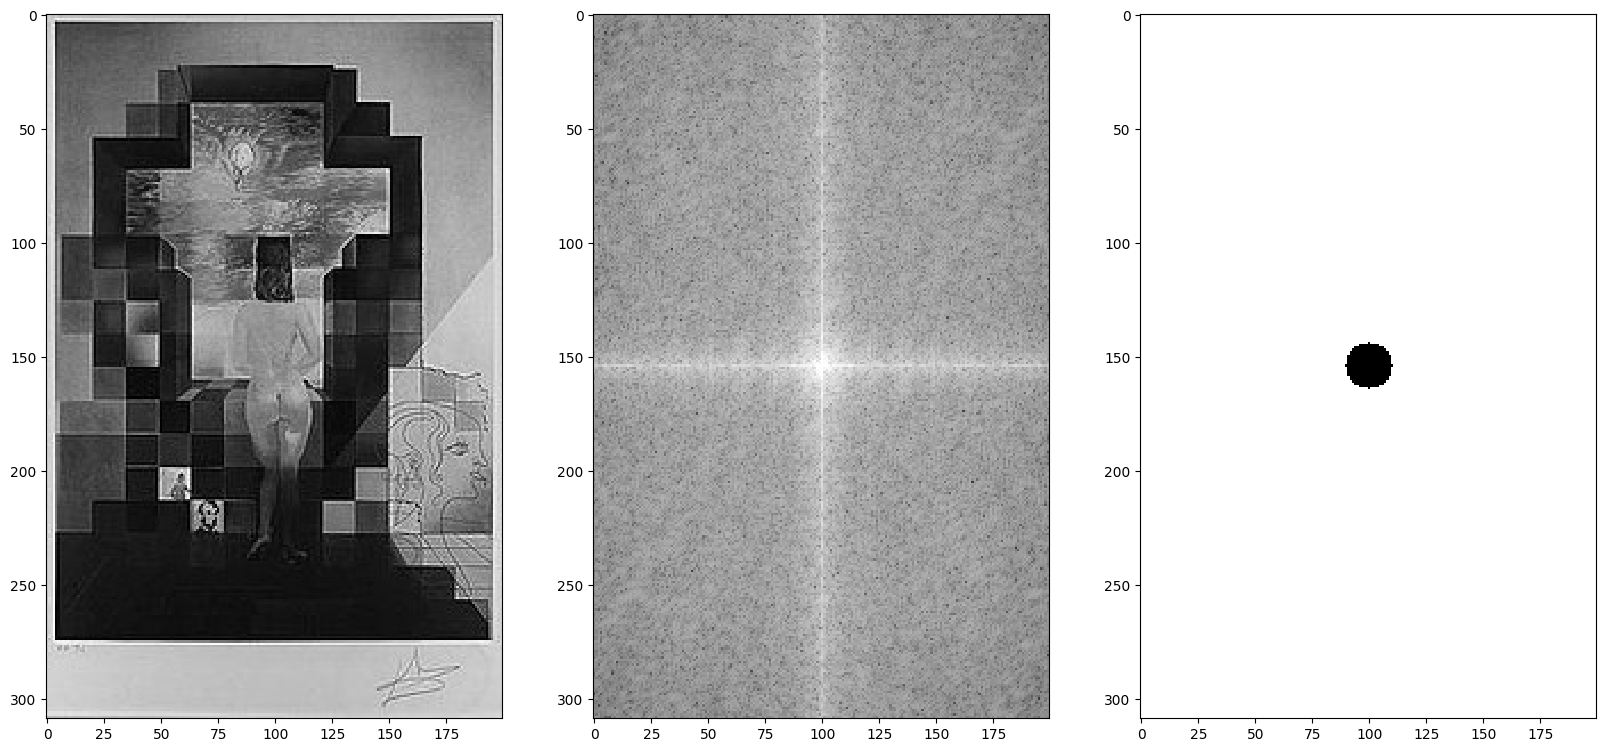

In [65]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [66]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-67-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


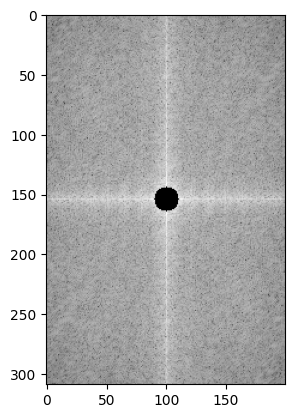

In [67]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

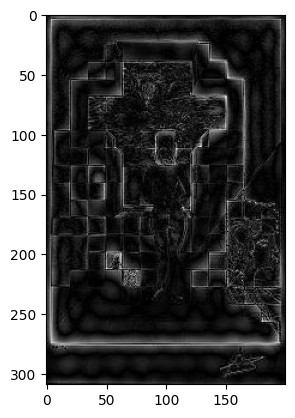

In [68]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

##Band pass filter

In [80]:
# create circle mask
radius1 = 32
mask1 = np.zeros_like(imgA1_gray)
cy1 = mask1.shape[0] // 2
cx1 = mask1.shape[1] // 2
cv2.circle(mask1, (cx1,cy1), radius1, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [82]:
# create circle mask
radius2 = 10
mask2 = np.zeros_like(imgA1_gray)
cy2 = mask2.shape[0] // 2
cx2 = mask2.shape[1] // 2
cv2.circle(mask2, (cx2,cy2), radius2, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [83]:
mask2 = np.invert(mask2)

In [132]:
#multi circle
mask = np.multiply(mask1,mask2)
mask = mask.astype('uint8')*255

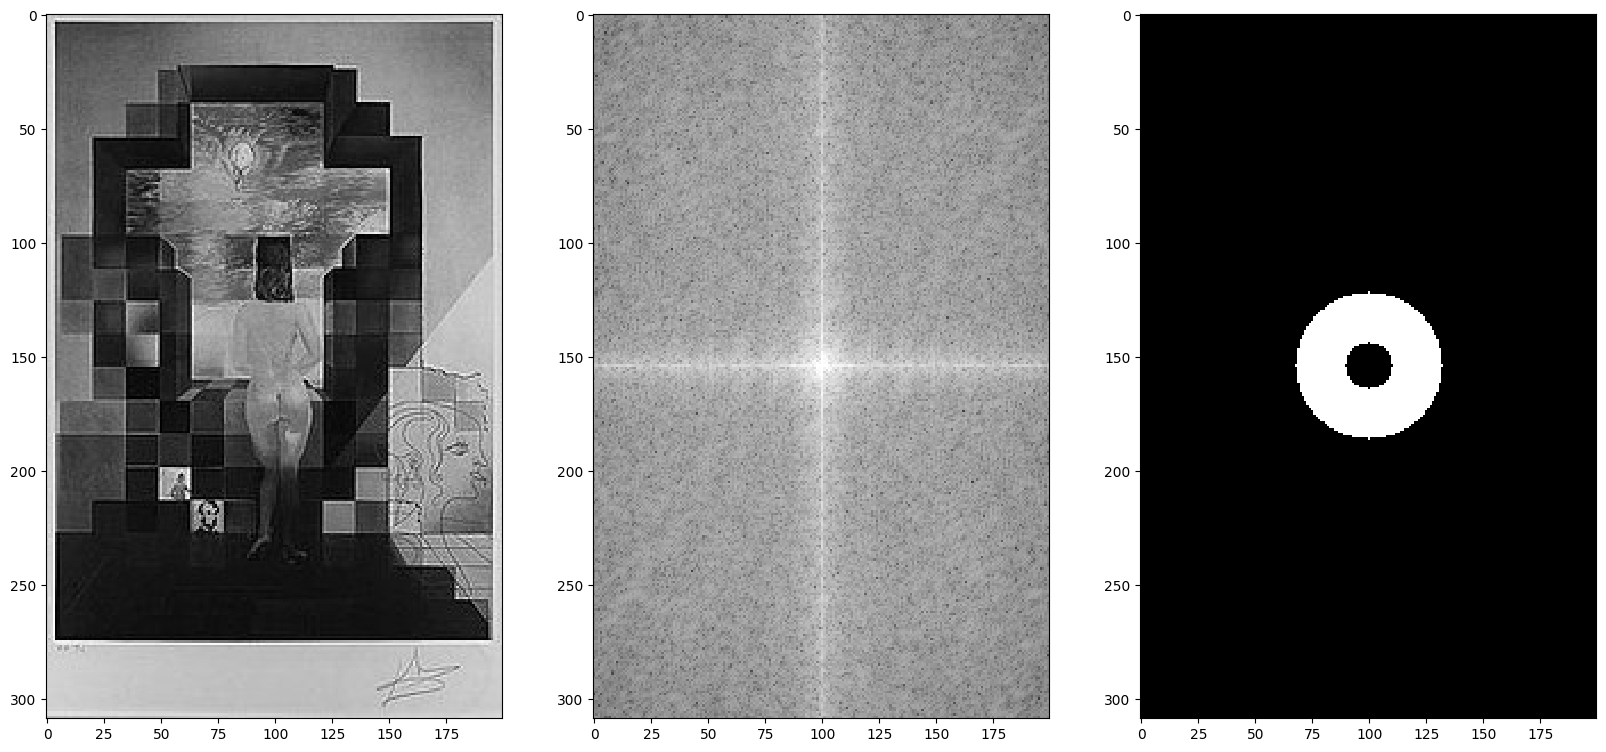

In [133]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [134]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-135-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


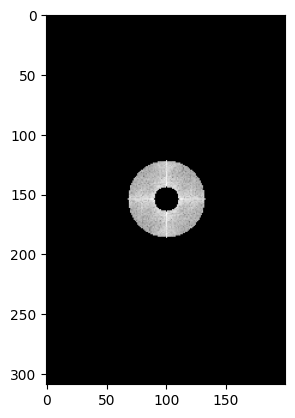

In [135]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

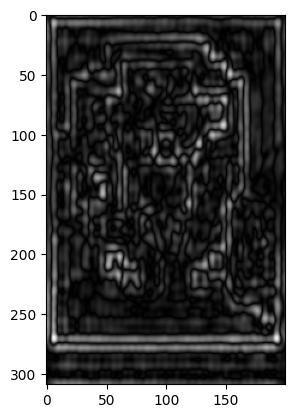

In [136]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

##Band elimination filter

In [137]:
#invert from band pass
mask = np.invert(mask)

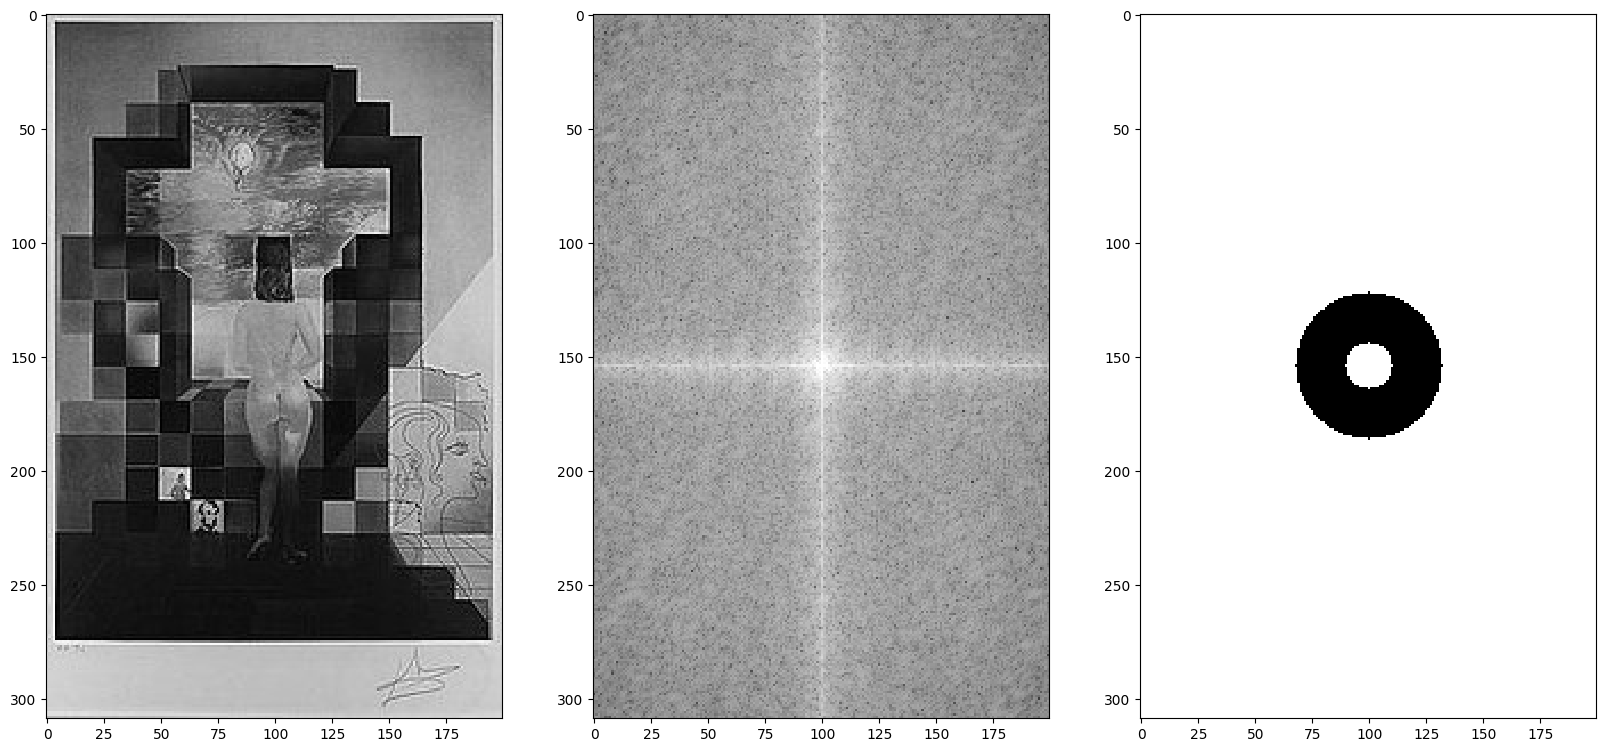

In [138]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_gray, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [139]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-140-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


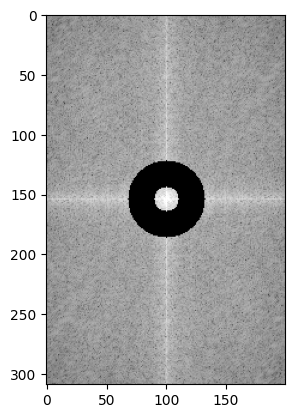

In [140]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

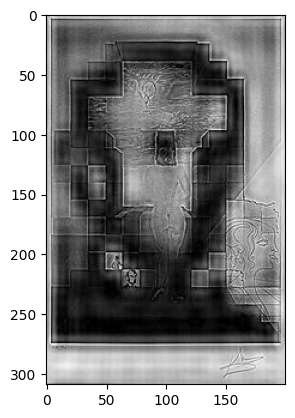

In [141]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

# Assignment 2: Try this tutorial with color images (Perform LPF, HPF, BPF, BEF).

In [ ]:
# Assignment 2: Try this tutorial with color images (Perform LPF, HPF, BPF, BEF).
# Try at least 3 images to compare the characteristics of frequencies
# Also, test these filtering methods in different frequency range too.

##LPF

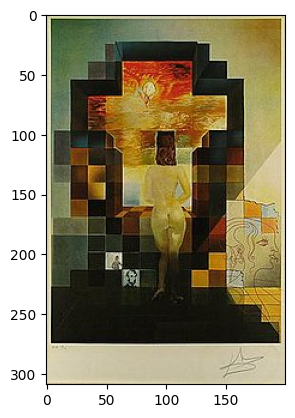

In [142]:
imgA1 = cv2.imread('/content/drive/MyDrive/Computer vision/lab06/Images/test1.jpg')
imgA1_rgb = cv2.cvtColor(imgA1,cv2.COLOR_BGR2RGB)
plt.imshow(imgA1_rgb)

In [154]:
# Assuming imgA1_rgb is a color image with shape (height, width, 3)
# where the last dimension represents the color channels (R, G, B)

# Separate the color channels
red_channel = imgA1_rgb[:,:,0]
green_channel = imgA1_rgb[:,:,1]
blue_channel = imgA1_rgb[:,:,2]

# Perform 2D Fourier transform on each channel
fft_red = np.fft.fft2(red_channel)
fft_green = np.fft.fft2(green_channel)
fft_blue = np.fft.fft2(blue_channel)

# If you want to transform along both axes for each channel:
# fft_red = np.fft.fft2(red_channel, axes=(0, 1))
# fft_green = np.fft.fft2(green_channel, axes=(0, 1))
# fft_blue = np.fft.fft2(blue_channel, axes=(0, 1))

# Combine the results
fft_image = np.stack([fft_red, fft_green, fft_blue], axis=-1)

In [162]:
fshift = np.fft.fftshift(fft_image)

# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = magnitude_spectrum.astype('uint8')*255

In [ ]:
# create circle mask
radius = 32
mask = np.zeros_like(imgA1_rgb)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

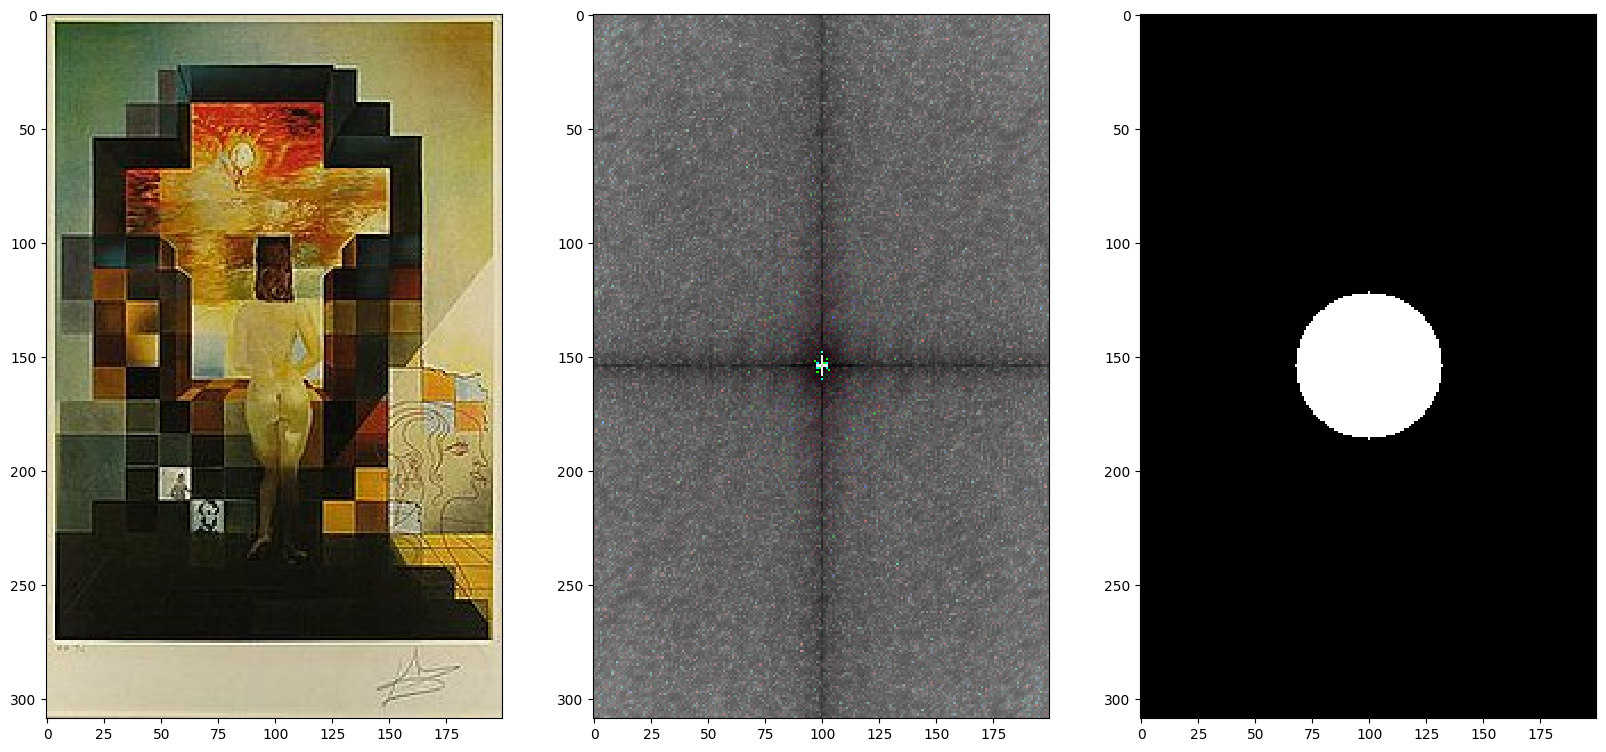

In [163]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_rgb, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [171]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-172-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


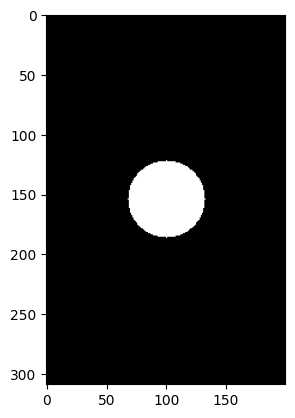

In [172]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

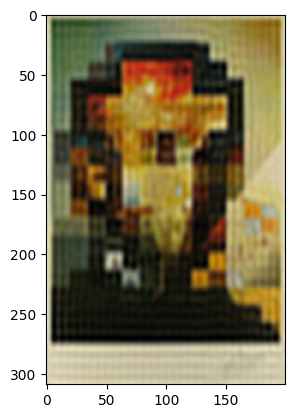

In [173]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

##HPF

In [174]:
#invert circle from LPF
mask = np.invert(mask)

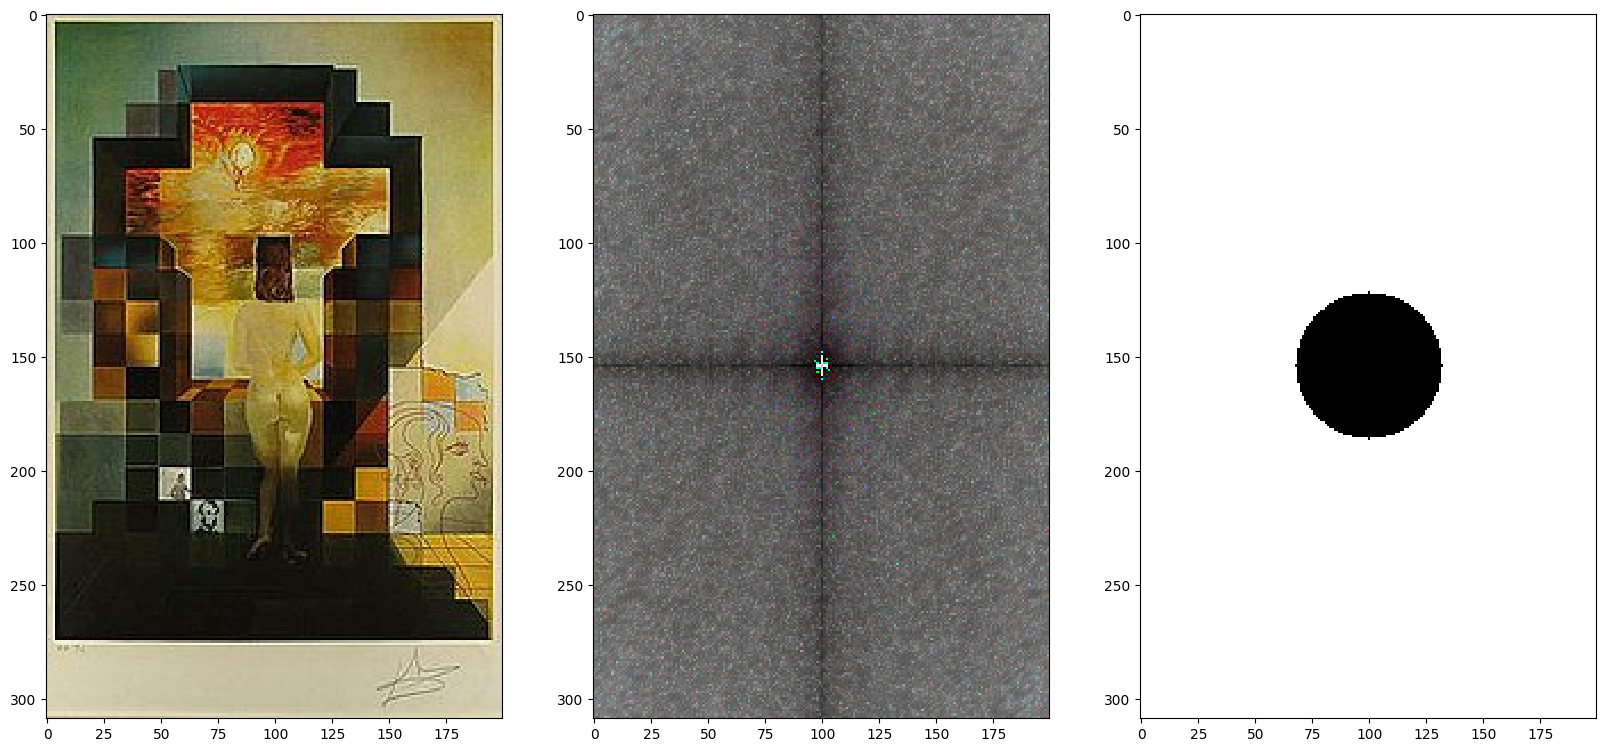

In [175]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_rgb, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [176]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-180-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


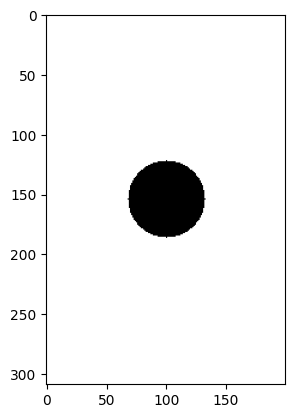

In [180]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

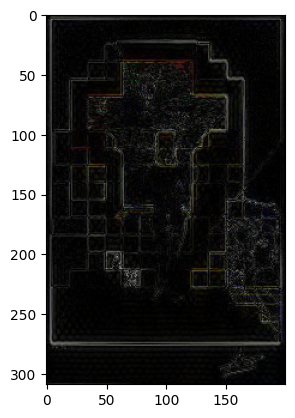

In [178]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

##BPF

In [181]:
# create circle mask
radius1 = 32
mask1 = np.zeros_like(imgA1_gray)
cy1 = mask1.shape[0] // 2
cx1 = mask1.shape[1] // 2
cv2.circle(mask1, (cx1,cy1), radius1, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [182]:
# create circle mask
radius2 = 10
mask2 = np.zeros_like(imgA1_gray)
cy2 = mask2.shape[0] // 2
cx2 = mask2.shape[1] // 2
cv2.circle(mask2, (cx2,cy2), radius2, (255,255,255), -1)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [183]:
mask2 = np.invert(mask2)

In [191]:
#multi circle
mask = np.multiply(mask1,mask2)
mask = mask[:, :, None]
mask = mask.astype('uint8')*255

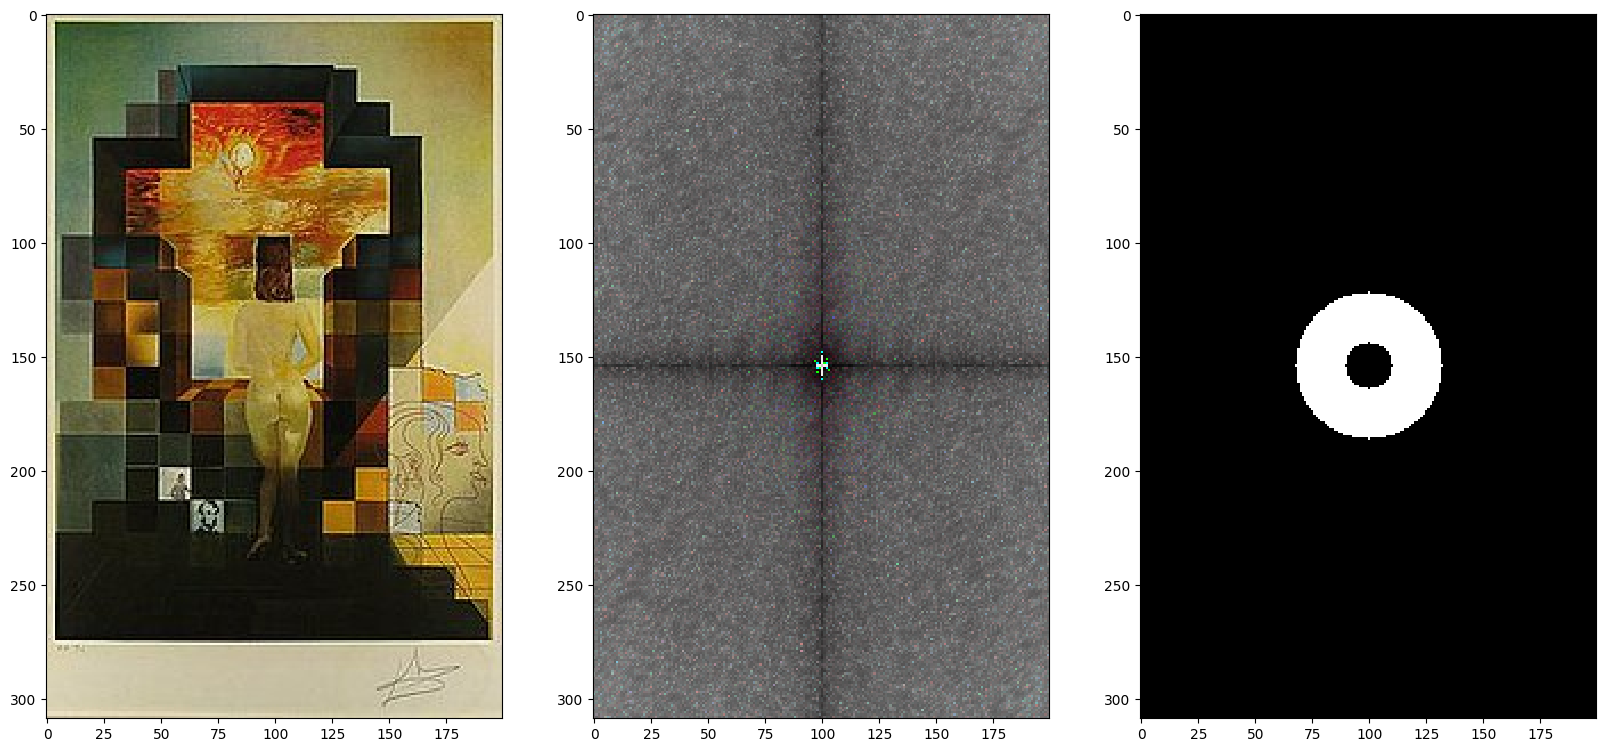

In [192]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_rgb, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [193]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-194-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


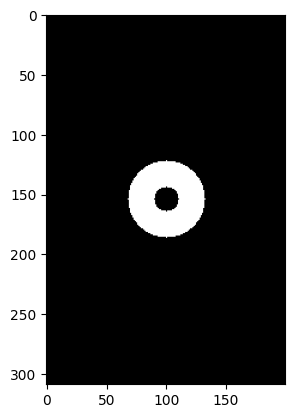

In [194]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

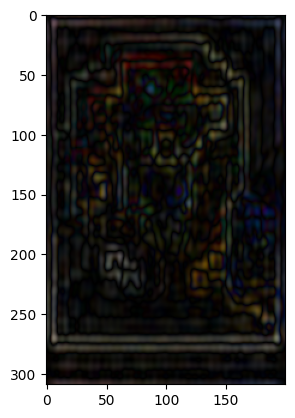

In [195]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()

#BEF

In [196]:
#invert circle from BPF
mask = np.invert(mask)

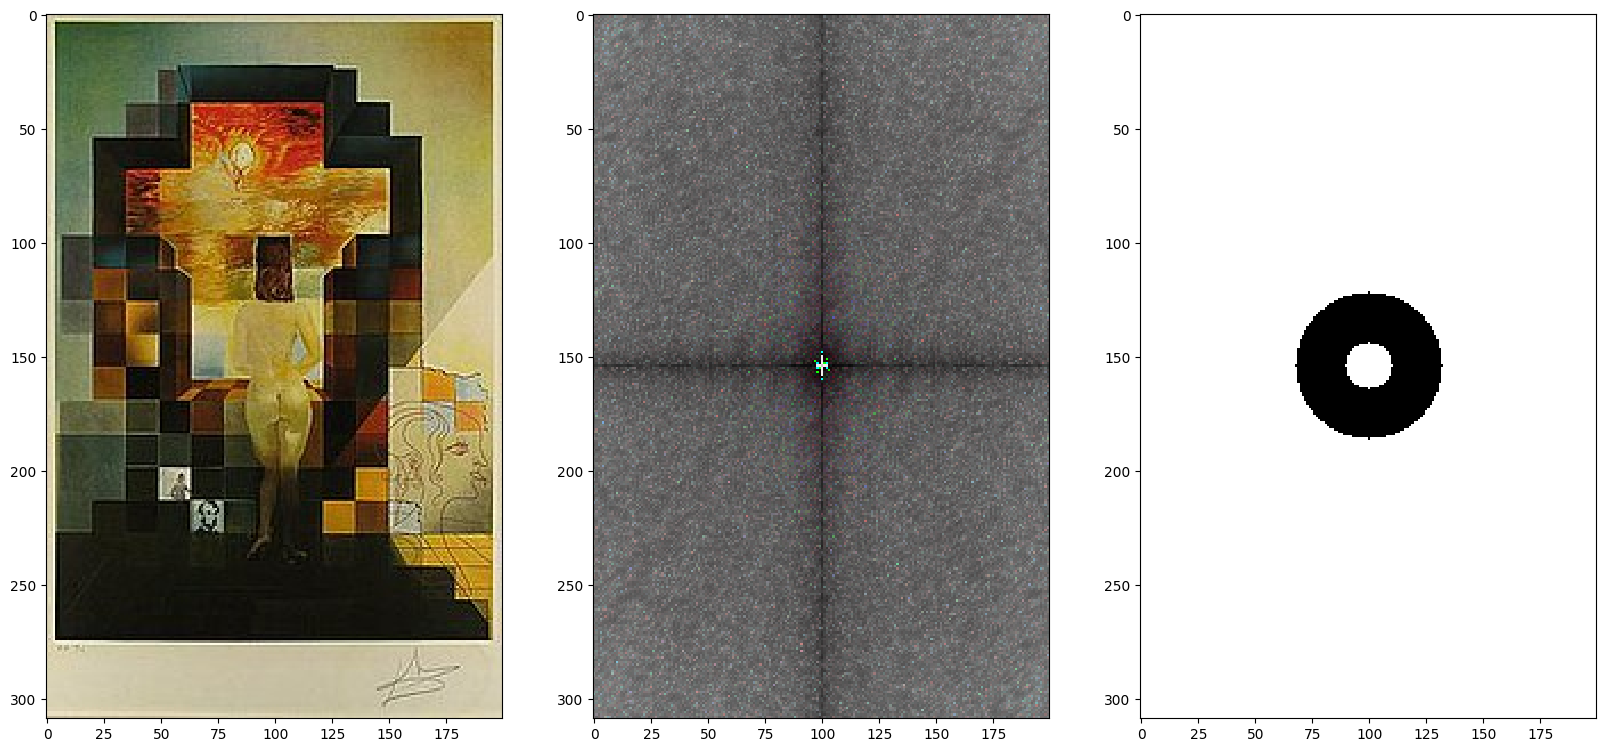

In [197]:
# display the images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(imgA1_rgb, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax2.imshow(magnitude_spectrum, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
ax3.imshow(mask, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()

In [198]:
# apply mask to fshift
dft_shift_masked = np.multiply(fshift,mask) / 255

<ipython-input-199-fcbdfc75c8fb>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))


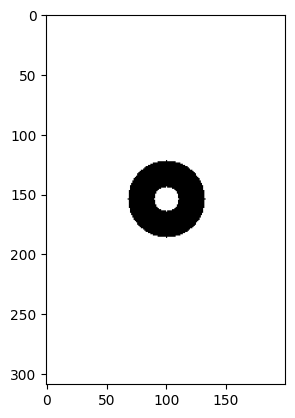

In [199]:
# generate spectrum from magnitude image (for viewing only)
magnitude_spectrum_dft_shift_masked = 20*np.log(np.abs(dft_shift_masked))

plt.set_cmap("gray")
plt.imshow(magnitude_spectrum_dft_shift_masked.clip(0,255))
plt.show()

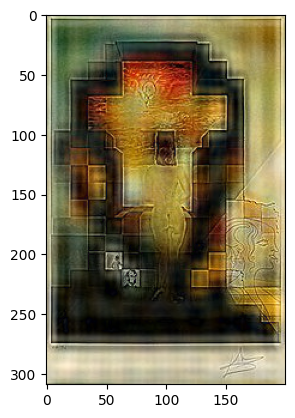

In [200]:
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)

plt.set_cmap("gray")
plt.imshow(img_filtered)
plt.show()